In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [28]:
iris = load_iris()
X = iris.data
y = iris.target
X = PCA(n_components=2).fit_transform(X)

centroids = []
labels = []
losses = []

In [54]:
def loss(x, labels):
    l = 0
    for y in np.unique(labels):
        cluster = x[labels == y]
        centroid = cluster.mean(axis=0)
        # SSE
        dist = np.sum((cluster - centroid) ** 2, axis=1)
        l += np.sum(dist)
    return l


def get_labels(x, centroids):
    dist = cdist(x, centroids)
    return np.argmin(dist, axis=1)


def recompute_centroids(x, labels):
    _labels = np.unique(labels)
    centroids = np.zeros((_labels.shape[0], x.shape[1]))
    for i, c in enumerate(_labels):
        cluster = x[labels == c]
        centroids[i] = cluster.mean(axis=0)
    return centroids

In [30]:
# Step 1 - randomly pick 3 centroids as the initial gues
centroids.append(
    X[np.random.choice(np.arange(X.shape[0]), size=(3,))]
)

In [31]:
# Step 2 - Assign each data points to the closest cluster center

In [32]:
c = centroids[-1]
dist = cdist(X, c)

label = np.argmin(dist, axis=1)
labels.append(label)
print(loss(X, label))

132.9857451337387


In [42]:
# Step 3 - recompute centroids as average of each cluster, and repeat

centroids.append(recompute_centroids(X, labels[-1]))

c = centroids[-1]
dist = cdist(X, c)

label = np.argmin(dist, axis=1)
labels.append(label)
print(loss(X, label))

127.65360526667546


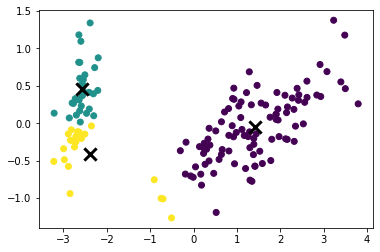

In [53]:
plt.scatter(*X.T, c=labels[-1])
plt.scatter(*centroids[-1].T, s=150, marker='x', lw=3, c='k')

In [92]:
from matplotlib.animation import FuncAnimation

In [94]:
FuncAnimation?

Init signature:
FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
Makes an animation by repeatedly calling a function *func*.

.. note::

    You must store the created Animation in a variable that lives as long
    as the animation should run. Otherwise, the Animation object will be
    garbage-collected and the animation stops.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied via the *fargs* parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    If ``blit == True``, *func* must return an iterable of all artists
    that were modified or created. This information

In [90]:
def kmeans(x, n_clusters, max_iter=1000, centroid_tol=1e-6, figsize=(10, 8), **fig_kwargs):
    # 0th step
    centroids = [
        x[np.random.choice(np.arange(x.shape[0]), size=(n_clusters,))]
    ]
    c = centroids[-1]
    dist = cdist(x, c)
    labels = [
        np.argmin(dist, axis=1)
    ]
    losses = [
        loss(x, labels[-1])
    ]
    fig, ax = plt.subplots(figsize=figsize, **fig_kwargs)
    ax.scatter(*x.T, c=labels[-1], alpha=0.5, edgecolors='face')
    ax.scatter(*c.T, s=150, marker='x', lw=3, c='k')
    ax.set_title(f'Iter 0; Loss = {losses[-1]}')
    for _ in range(max_iter):
        prev_centroid = centroids[-1]
        prev_labels = labels[-1]
        new_centroid = recompute_centroids(x, prev_labels)
        centroids.append(new_centroid)
        labels.append(get_labels(x, new_centroid))
        losses.append(loss(x, labels[-1]))
        
        if np.abs(new_centroid - prev_centroid).sum() <= centroid_tol:
            break
    
    return centroids, losses, labels

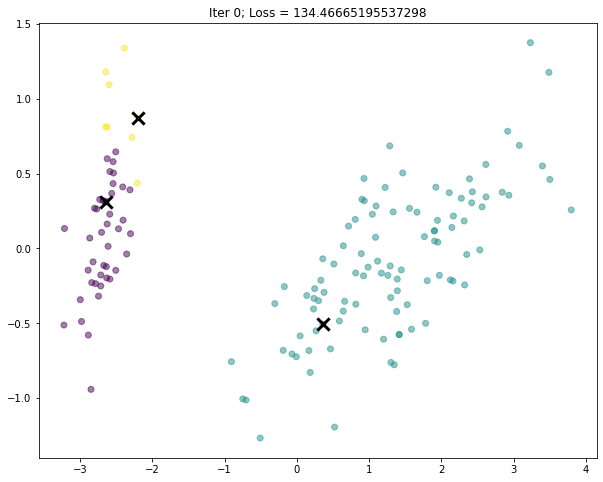

In [91]:
c, _, labels = kmeans(X, 3)